Image segmentation is the classification of an image into different groups. Many researches have been done in the area of image segmentation using clustering. There are different methods and one of the most popular methods is k-means clustering algorithm. K -means clustering algorithm is an unsupervised algorithm and it is used to segment the interest area from the background. But before applying K -means algorithm, first partial stretching enhancement is applied to the image to improve the quality of the image. Subtractive clustering method is data clustering method where it generates the centroid based on the potential value of the data points. So subtractive cluster is used to generate the initial centers and these centers are used in k-means algorithm for the segmentation of image. Then finally medial filter is applied to the segmented image to remove any unwanted region from the image...

Image segmentation 

Image segmentation is the process of partitioning an image into multiple different regions (or segments). The goal is to change the representation of the image into an easier and more meaningful image.

It is an important step in image processing, as real world images doesn't always contain only one object that we wanna classify. For instance, for self driving cars, the image would contain the road, cars, pedestrians, etc. So we may need to use segmentation here to separate objects and analyze each object individually (i.e image classification) to check what it is.

K-Means clustering is unsupervised machine learning algorithm that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest mean. A cluster refers to a collection of data points aggregated together because of certain similarities. For image segmentation, clusters here are different image colors.


Image segmentation is an essential topic in an image processing framework. It is the process to classify an image into different groups. There are many different methods, and k-means is one of the most popular methods.

In [1]:

from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread

from sklearn.feature_extraction import image
from sklearn.cluster import KMeans
from skimage.filters import rank, threshold_otsu
from skimage.morphology import closing, square, disk
from skimage import exposure as hist, data, img_as_float
from skimage.segmentation import chan_vese
from skimage.feature import canny
from skimage.color import rgb2gray
from scipy import ndimage as ndi 

The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. No tilde expansion is done, but *, ?, and character ranges expressed with [] will be correctly matched. This is done by using the os.scandir() and fnmatch.fnmatch() functions in concert, and not by actually invoking a subshell. Note that unlike fnmatch.fnmatch(), glob treats filenames beginning with a dot (.) as special cases. (For tilde and shell variable expansion, use os.path.expanduser() and os.path.expandvars().)

For a literal match, wrap the meta-characters in brackets. For example, '[?]' matches the character '?'.

link : https://docs.python.org/3/library/glob.html

In [2]:
from glob import glob

pol7_images_1 = glob('/home/idisc02/Saarland_Forest_monitoring_research/Reforestation_Monitoring/Plant_For_Planet_above200_dataset/polygon_7/1b146699-0721-4fc8-a15d-e7ce221cc7fd/PSScene/*.tif')
pol217_images_2 = glob('/home/idisc02/Saarland_Forest_monitoring_research/Reforestation_Monitoring/Plant_For_Planet_above200_dataset/polygon_217/22f6afc4-bfd4-4f38-a6b9-cf560f54afcb/PSScene/*.tif')

In [3]:
len(pol7_images_1)


248

In [4]:
len(pol217_images_2)

250

In [24]:
#pip install --upgrade scikit-image

In [25]:
import skimage
print(skimage.__version__)

0.19.3


In [27]:
#https://www.sciencedirect.com/topics/engineering/binary-image
def binary(image):
    return image > threshold_otsu(image)

#https://campus.datacamp.com/courses/introduction-to-data-visualization-in-python/analyzing-time-series-and-images?ex=13
def equalize(image):
    return hist.equalize_hist(image)

#https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm
from skimage.util import img_as_ubyte

def mean_filter(image, raio_disk):
    image = img_as_ubyte(image)
    return rank.mean_percentile(image, footprint = disk(raio_disk))

def preenche_bords(image):
    return ndi.binary_fill_holes(image)

#https://www.unioviedo.es/compnum/labs/PYTHON/intro_image.html

def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp
    
def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);

        
def plot_camadas(img):
    plt.figure(figsize = (15, 25))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img[:,:,i], cmap = 'gray');
        
def d2Kmeans(img, k):
    return KMeans(
                  random_state=1, 
                  n_clusters = k, 
                  init='k-means++'
    ).fit(img.reshape((-1,1))).labels_.reshape(img.shape)

from PIL import Image
import numpy as np


import numpy as np

def merge_segmented_mask_ROI(uri_img, img_kluster):
    img = uri_img.copy()
    img_kluster_resized = np.resize(img_kluster, img.shape[:2])
    for ch in range(3):
        img[:,:, ch] *= img_kluster_resized
    return img

def elbow(img, k):
    hist = []
    for kclusters in  range(1, k):
        Km = KMeans(random_state=1, n_clusters = kclusters, init='k-means++').fit(img.reshape((-1,1)))  
        hist.append(Km.inertia_)
        
    plt.figure(figsize = (15, 8))
    plt.grid()
    plt.plot(range(1, k), hist, 'o-')
    plt.ylabel('Soma das distâncias quadradas')
    plt.xlabel('k clusters')
    plt.title('Elbow')
    plt.show();
    
    

In [28]:
mal= load_images(pol7_images_1)
ben= load_images(pol217_images_2)

# mal_1 = load_images(mal_images_1)
# ben_1 = load_images(ben_images_1)

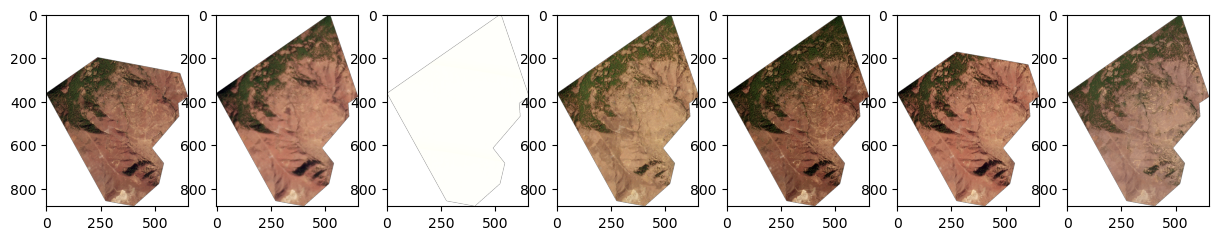

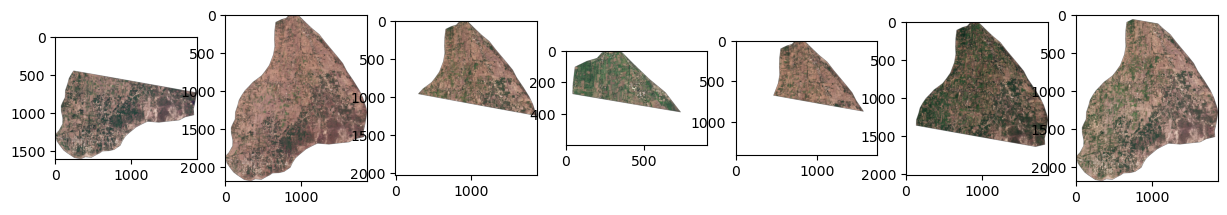

In [9]:
plot_any(mal[:7])
plot_any(ben[:7])

In [10]:


img_selected = mal[5]



/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

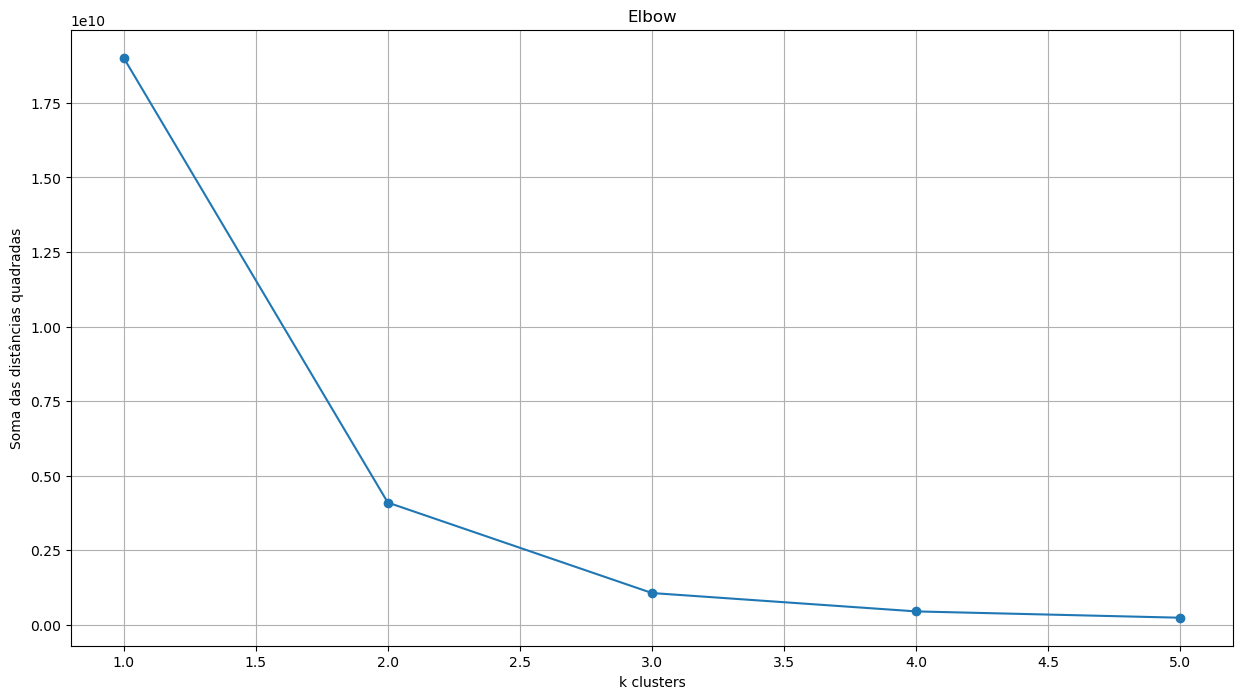

In [11]:
elbow(img_selected, 6)

In [16]:
k_klusters = 3

In [17]:
result_gray = d2Kmeans(rgb2gray(img_selected[..., :3]), k_klusters)
result_img = d2Kmeans(img_selected, k_klusters)

/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


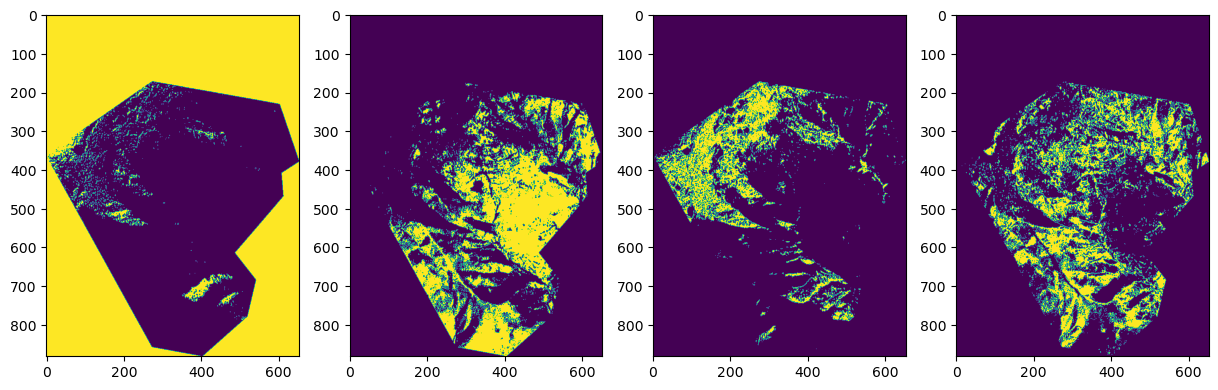

In [18]:
klusters_gray = [result_gray == i for i in range(k_klusters)]
plot_any(klusters_gray)

In [29]:
def select_cluster_index(clusters):
    minx = clusters[0].mean()
    index = 0
    for i in clusters:
        if i.mean() < minx:
            minx = i.mean()
            index += 1
    return index

In [30]:
index_kluster = select_cluster_index(klusters_gray)
print(index_kluster)
selecionado = klusters_gray[index_kluster]

2


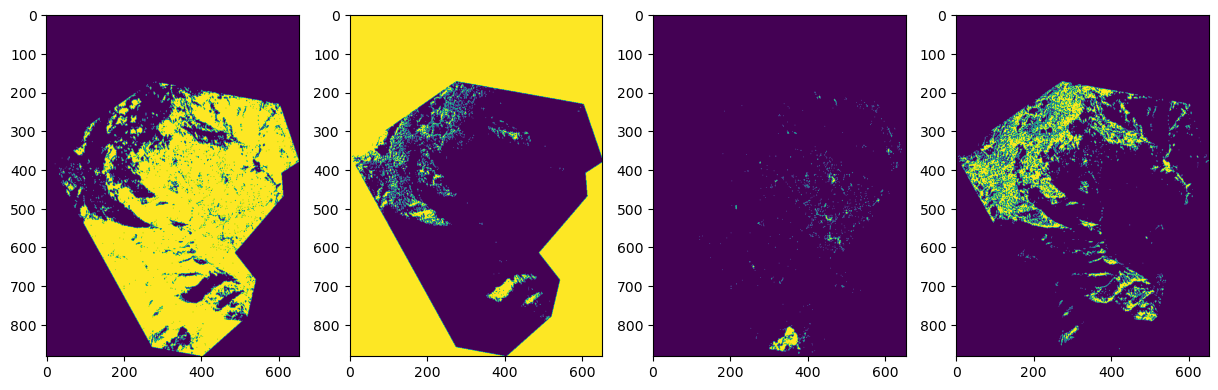

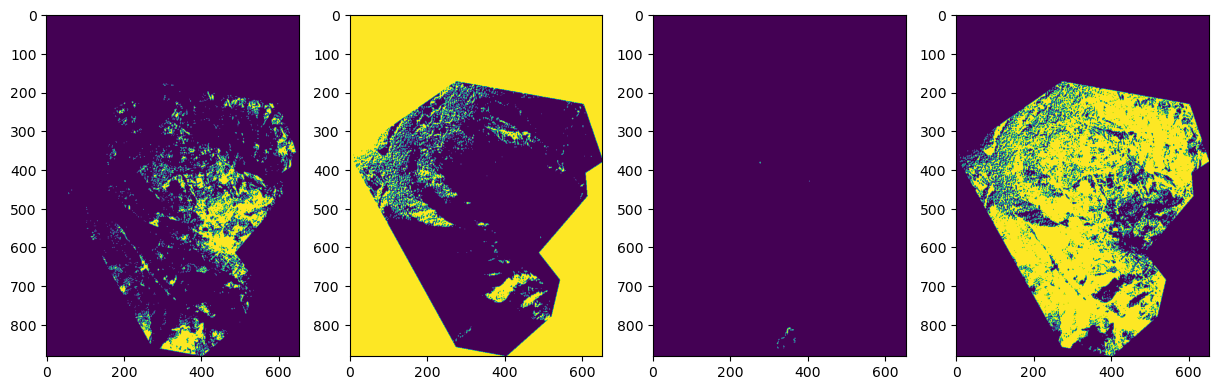

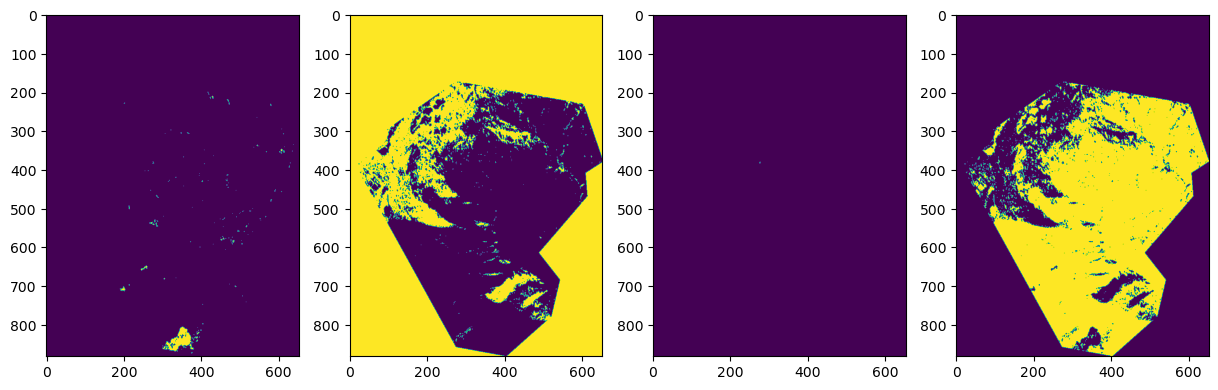

In [31]:
 for ch in range(3):
    img_k = []
    for K in range(k_klusters):
         img_k.append(result_img[:, :, ch] == K)
    plot_any(img_k)

In [32]:
clusters = [(result_img[:,:,1] == K) for K in range(k_klusters)]

In [33]:
clusters

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [34]:
new_img = merge_segmented_mask_ROI(img_selected, selecionado)

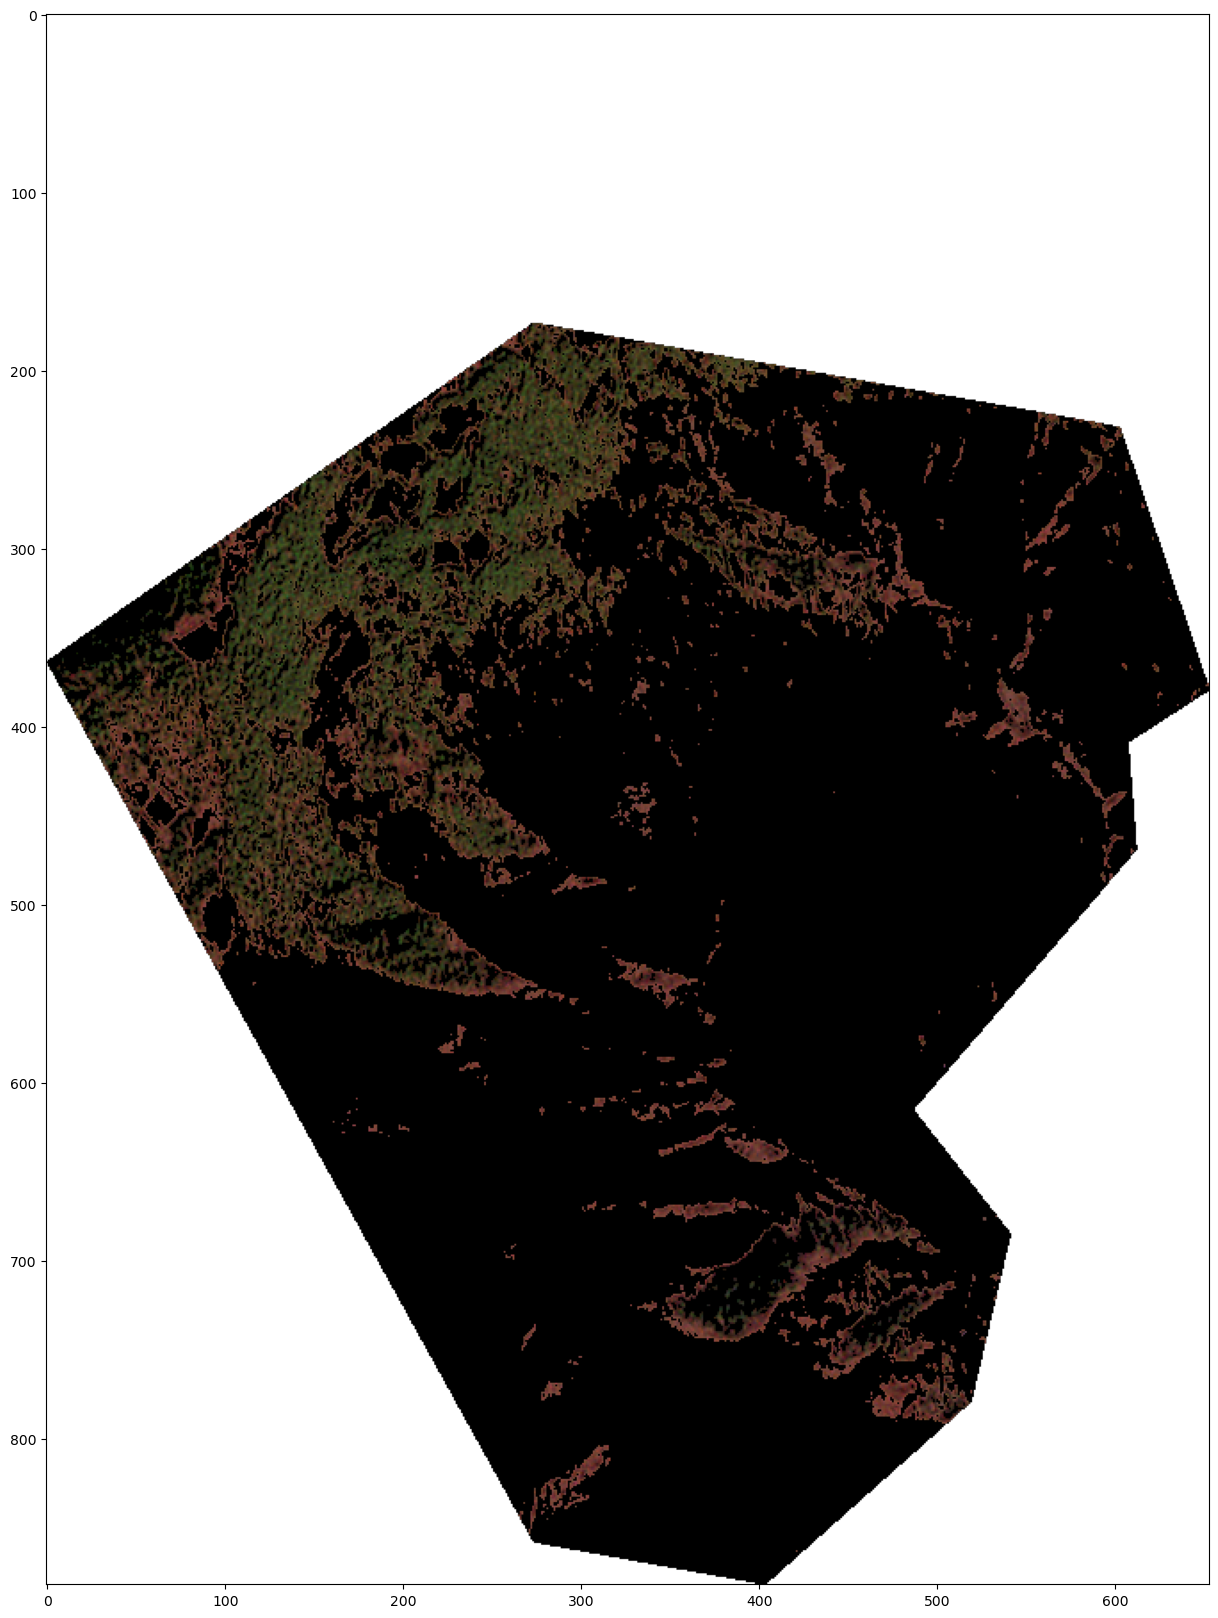

In [35]:
plot_any([new_img])

In [36]:
image_mean_filter = mean_filter(selecionado, 20)
test_binary = binary(image_mean_filter)

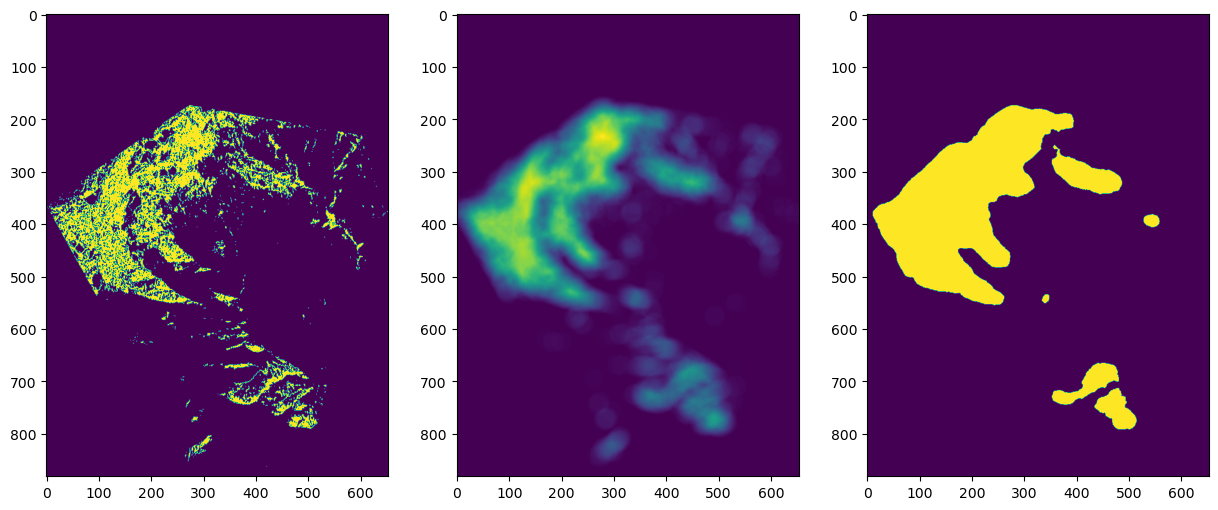

In [37]:
plot_any([selecionado, image_mean_filter, test_binary])

In [38]:
final_result = merge_segmented_mask_ROI(img_selected ,test_binary)

In [27]:
final_result.shape

(882, 653, 4)

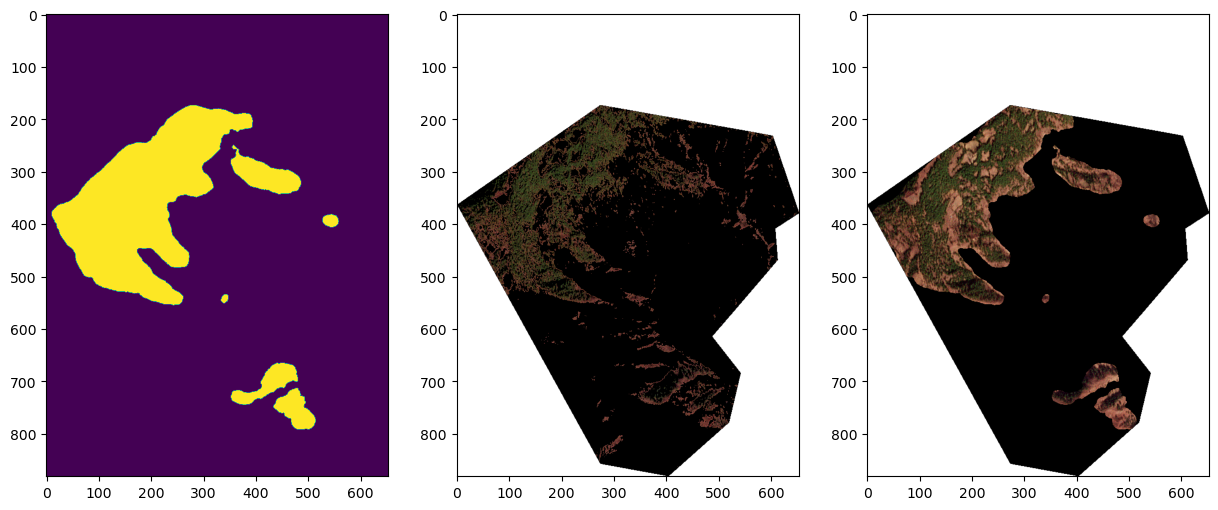

In [39]:
plot_any([test_binary, new_img, final_result])

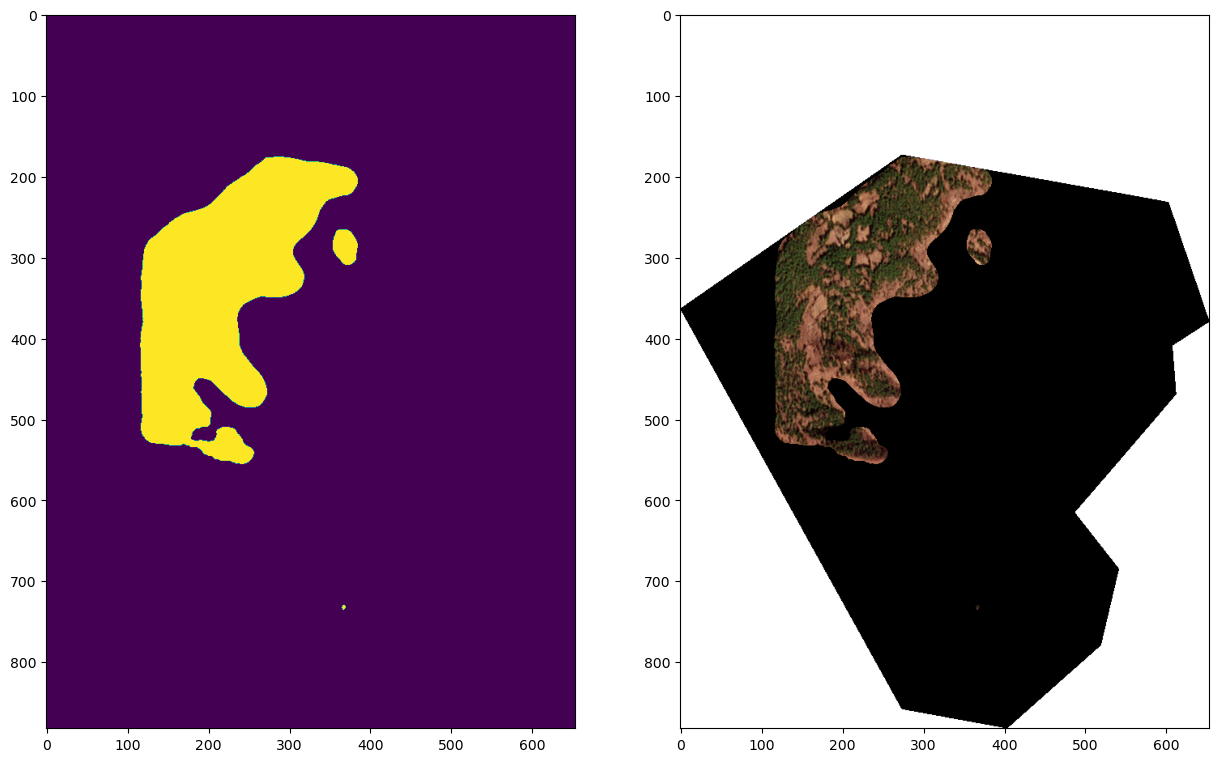

In [40]:
 max_mean = 0
img_gray = rgb2gray(final_result[..., :3])
img_bin  = binary(img_gray)
x, y = img_bin.shape

 limits_before = []
for i in range(x):
    for j in range(y):
        if  img_bin[i, j]:
            limits_before.append(j)
            
stop_before = ( sum(limits_before) // len(limits_before) ) // 2
img_copy = img_bin.copy()
for i in range(x):
    for j in range(stop_before):
        img_copy[i, j] = 0
        limits_after = []
for i in range(x):
     for j in range(y - 1, 0, -1):
        if  img_copy[i, j]:
            limits_after.append(j)
            
stop_after = sum(limits_after) // len(limits_after) + min(limits_after)
for i in range(x):
    for j in range(stop_after, y):
        img_copy[i, j] = 0

mean_result = mean_filter(img_copy, 15)
mean_result = binary(mean_result)
final_result = merge_segmented_mask_ROI(img_selected , mean_result)


 plot_any([mean_result, final_result])

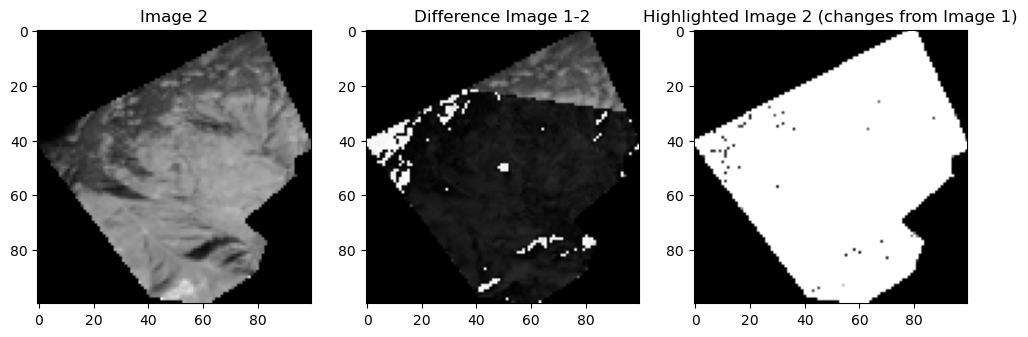

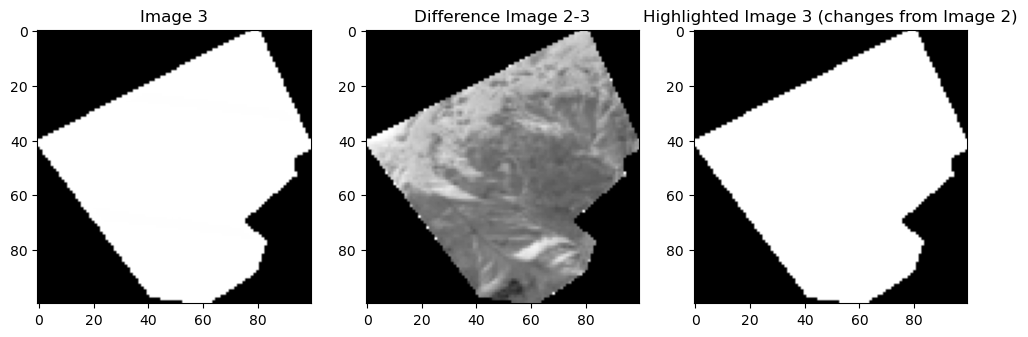

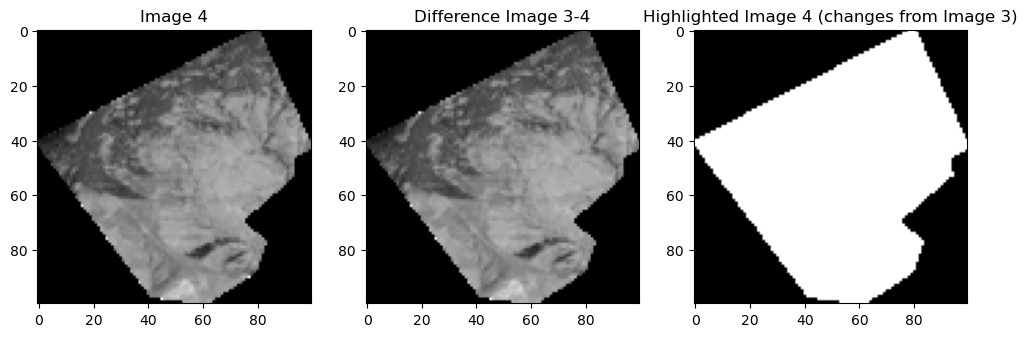

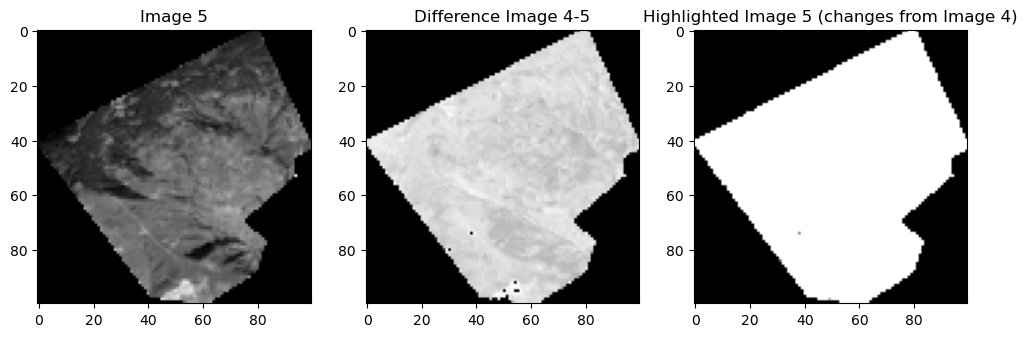

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the first 5 images
images = pol7_images_1[:5]

# Preprocess the images
processed_images = [np.array(Image.open(img).resize((100, 100)).convert('L')) for img in images]

# Compare each image to the next one and visualize the changes
for i in range(len(processed_images)-1):
    # Calculate the difference image
    diff_image = np.abs(processed_images[i+1] - processed_images[i])

    # Create a mask for the changes
    mask = diff_image > 0

    # Create a copy of the next image
    highlighted_image = processed_images[i+1].copy()

    # Highlight the changes in the copy
    highlighted_image[mask] = 255

    # Visualize the original image, the difference image, and the highlighted image
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(processed_images[i+1], cmap='gray')
    ax[0].set_title(f'Image {i+2}')
    ax[1].imshow(diff_image, cmap='gray')
    ax[1].set_title(f'Difference Image {i+1}-{i+2}')
    ax[2].imshow(highlighted_image, cmap='gray')
    ax[2].set_title(f'Highlighted Image {i+2} (changes from Image {i+1})')
    plt.show()

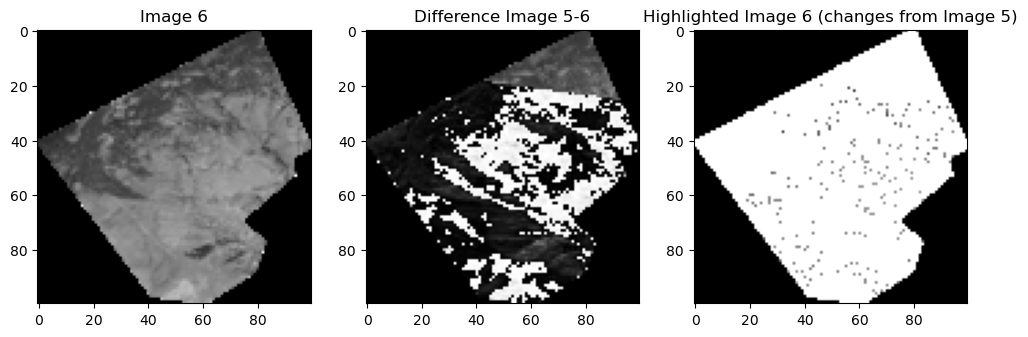

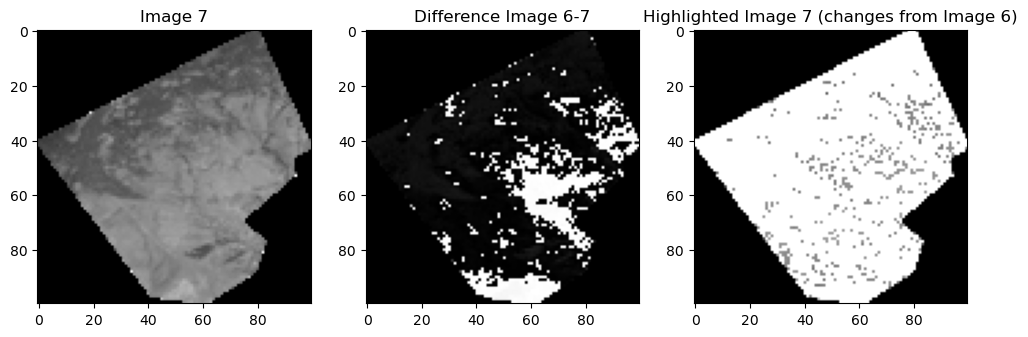

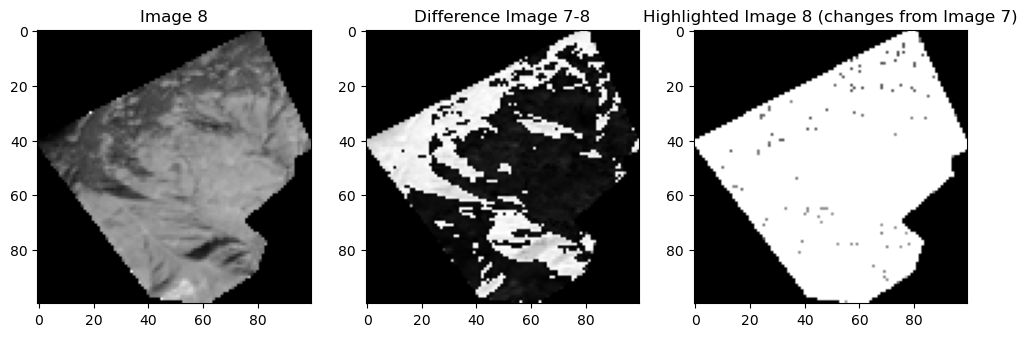

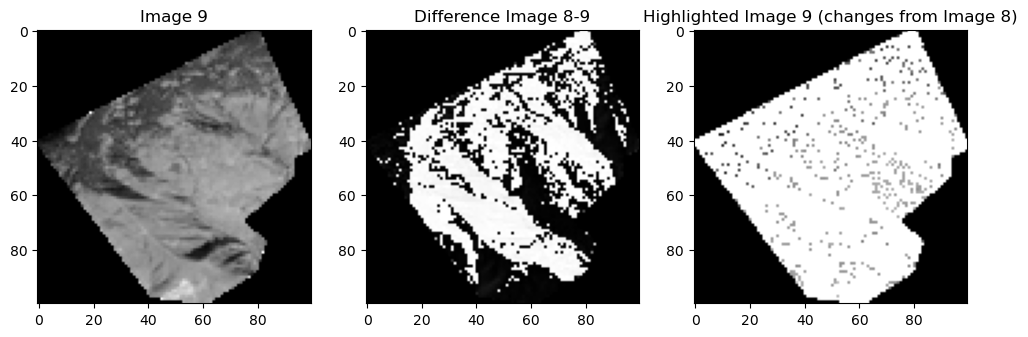

In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the next 5 images
images = pol7_images_1[5:10]

# Preprocess the images
processed_images = [np.array(Image.open(img).resize((100, 100)).convert('L')) for img in images]

# Compare each image to the next one and visualize the changes
for i in range(len(processed_images)-1):
    # Calculate the difference image
    diff_image = np.abs(processed_images[i+1] - processed_images[i])

    # Create a mask for the changes
    mask = diff_image > 0

    # Create a copy of the next image
    highlighted_image = processed_images[i+1].copy()

    # Highlight the changes in the copy
    highlighted_image[mask] = 255

    # Visualize the original image, the difference image, and the highlighted image
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(processed_images[i+1], cmap='gray')
    ax[0].set_title(f'Image {i+6}')
    ax[1].imshow(diff_image, cmap='gray')
    ax[1].set_title(f'Difference Image {i+5}-{i+6}')
    ax[2].imshow(highlighted_image, cmap='gray')
    ax[2].set_title(f'Highlighted Image {i+6} (changes from Image {i+5})')
    plt.show()

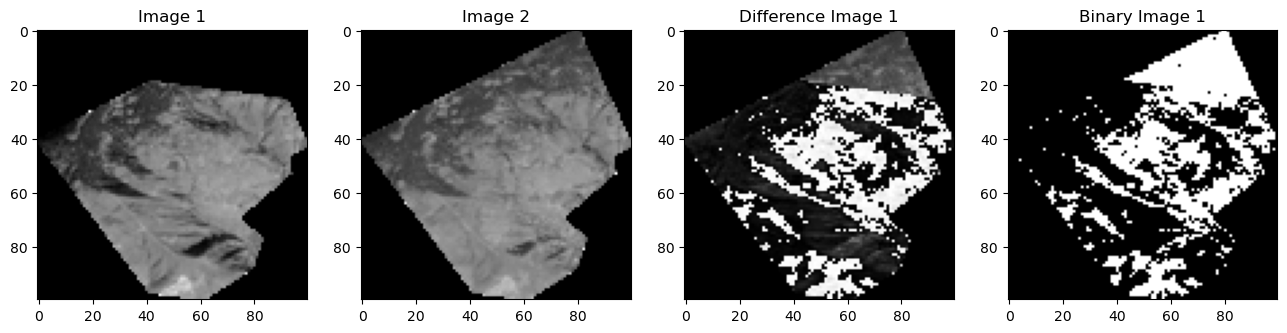

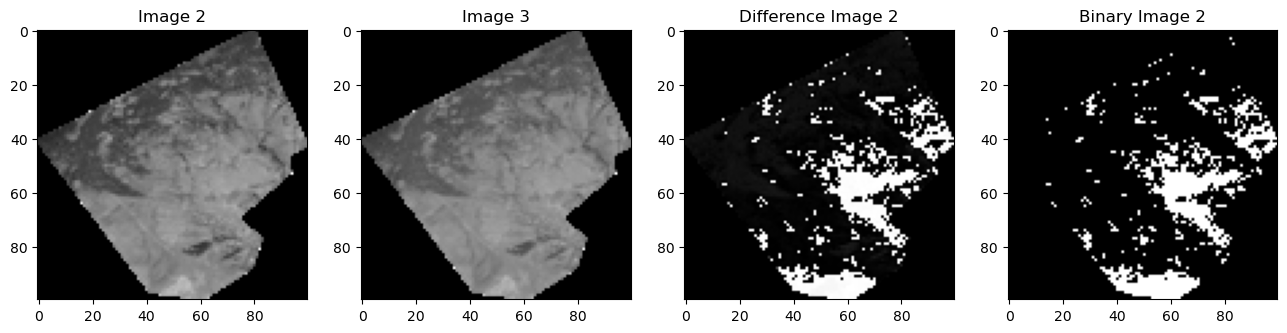

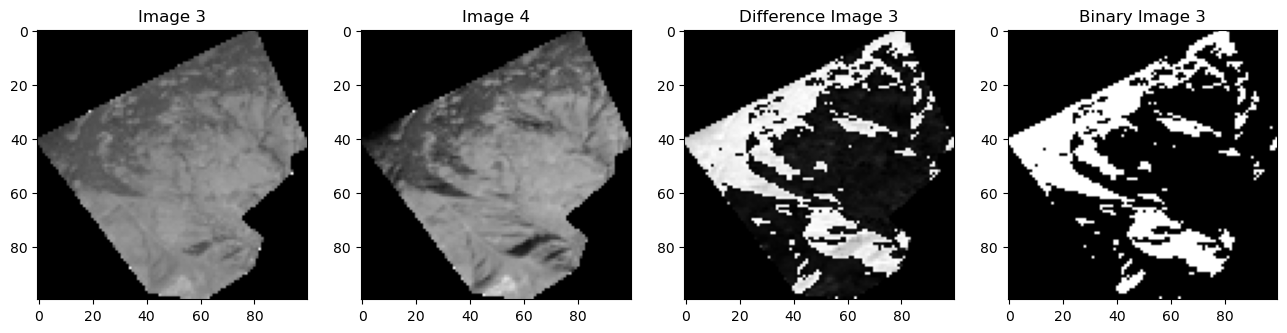

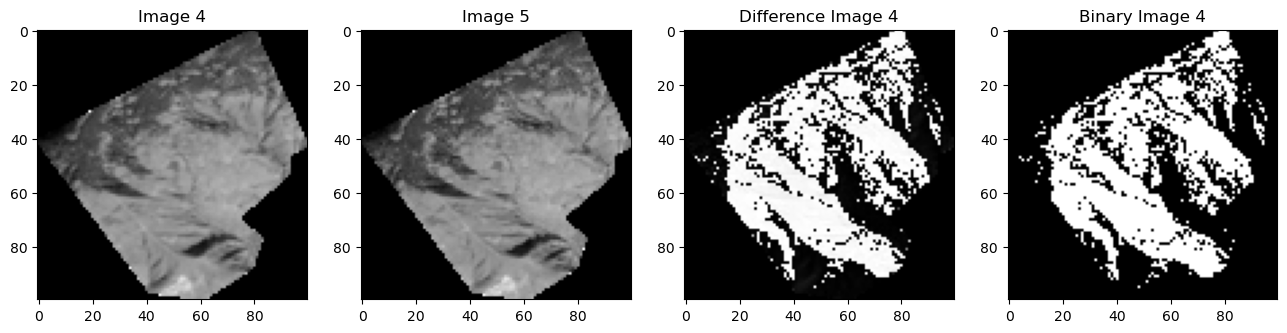

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the next 5 images
images = pol7_images_1[5:10]

# Preprocess the images
processed_images = [np.array(Image.open(img).resize((100, 100)).convert('L')) for img in images]

# Create difference images
diff_images = [np.abs(processed_images[i+1] - processed_images[i]) for i in range(len(processed_images)-1)]

# Apply a threshold to create binary images
binary_images = [diff_image > np.mean(diff_image) for diff_image in diff_images]

# Display the original images, the difference images, and the binary images
for i in range(len(diff_images)):
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    ax[0].imshow(processed_images[i], cmap='gray')
    ax[0].set_title(f'Image {i+1}')
    ax[1].imshow(processed_images[i+1], cmap='gray')
    ax[1].set_title(f'Image {i+2}')
    ax[2].imshow(diff_images[i], cmap='gray')
    ax[2].set_title(f'Difference Image {i+1}')
    ax[3].imshow(binary_images[i], cmap='gray')
    ax[3].set_title(f'Binary Image {i+1}')
    plt.show()

/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


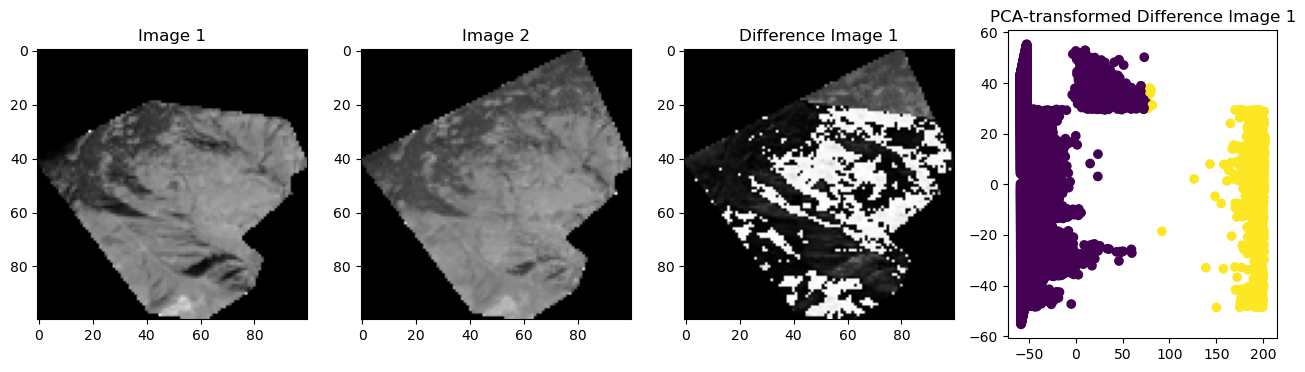

/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


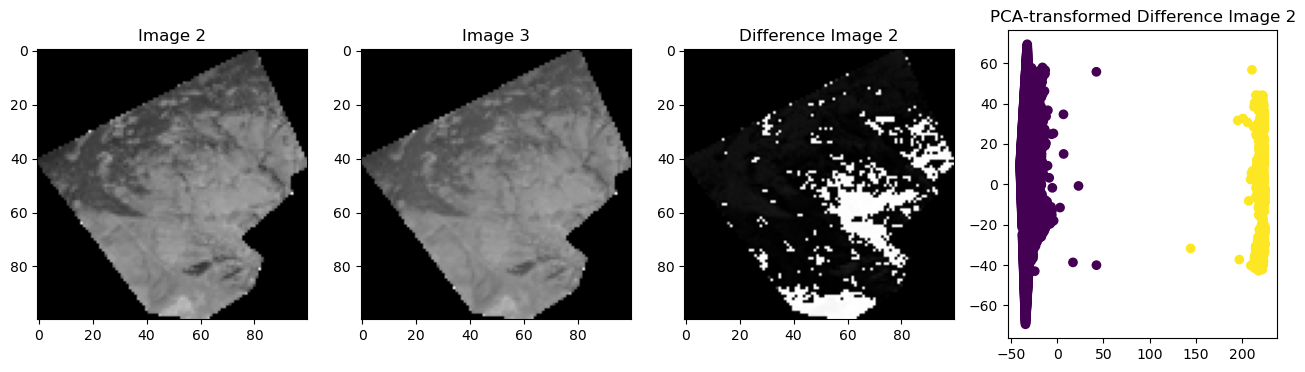

/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


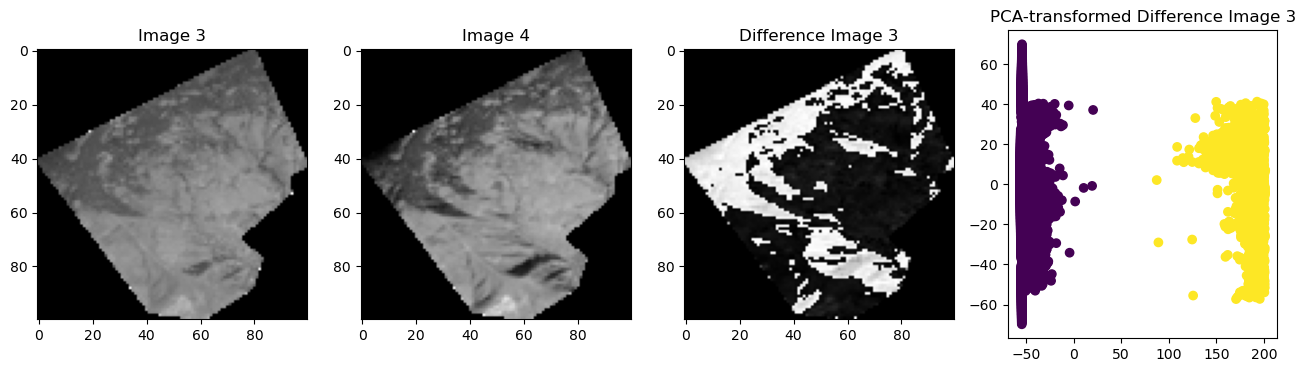

/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


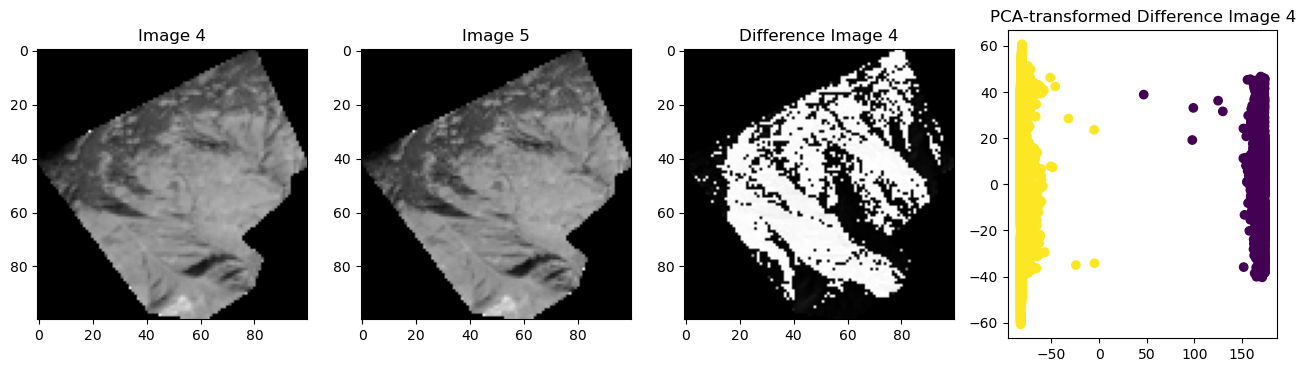

In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


images = pol7_images_1[5:10]

# Preprocess the images
processed_images = [np.array(Image.open(img).resize((100, 100)).convert('L')) for img in images]

# Create difference images
diff_images = [np.abs(processed_images[i+1] - processed_images[i]) for i in range(len(processed_images)-1)]

# Apply PCA and KMeans clustering to each difference image
for i, diff_image in enumerate(diff_images):
    # Flatten the difference image and create a 2D array where each row is a pixel and the columns are the x and y coordinates and the pixel intensity
    pixels = np.dstack(np.mgrid[0:100, 0:100]).reshape(-1, 2)
    pixels = np.hstack((pixels, diff_image.flatten().reshape(-1, 1)))

    # Apply PCA
    pca = PCA(n_components=2)
    pca_pixels = pca.fit_transform(pixels)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(pca_pixels)

    # Display the original images, the difference image, and the PCA-transformed difference image
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    ax[0].imshow(processed_images[i], cmap='gray')
    ax[0].set_title(f'Image {i+1}')
    ax[1].imshow(processed_images[i+1], cmap='gray')
    ax[1].set_title(f'Image {i+2}')
    ax[2].imshow(diff_image, cmap='gray')
    ax[2].set_title(f'Difference Image {i+1}')
    ax[3].scatter(pca_pixels[:, 0], pca_pixels[:, 1], c=kmeans.labels_)
    ax[3].set_title(f'PCA-transformed Difference Image {i+1}')
    plt.show()

# CLASSIFICATION OF FOREST AND NON FOREST AREAS

In [53]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Directories where the images are located
forest_directory = "/home/idisc02/Saarland_Forest_monitoring_research/Reforestation_Monitoring/plant_for_planets_geojson/Forest_Label_Images"
non_forest_directory = "/home/idisc02/Saarland_Forest_monitoring_research/Reforestation_Monitoring/plant_for_planets_geojson/Non_Forest_Labels"

# Load and preprocess the images
images = []
labels = []

# Load forest images
for filename in os.listdir(forest_directory):
    if filename.endswith(".tif"):
        img = Image.open(os.path.join(forest_directory, filename))
        img = img.resize((64, 64))  # Resize the image
        img = np.array(img)[:, :, :3]  # Keep only the first three channels
        img = img / 255.0  # Normalize the pixel values
        img = img.flatten()  # Flatten the image to create a feature vector
        images.append(img)
        labels.append(1)  # Label the images as forest

# Load non-forest images
for filename in os.listdir(non_forest_directory):
    if filename.endswith(".tif"):
        img = Image.open(os.path.join(non_forest_directory, filename))
        img = img.resize((64, 64))  # Resize the image
        img = np.array(img)[:, :, :3]  # Keep only the first three channels
        img = img / 255.0  # Normalize the pixel values
        img = img.flatten()  # Flatten the image to create a feature vector
        images.append(img)
        labels.append(0)  # Label the images as non-forest

print(f"Loaded {len(images)} images.")

images = np.array(images)
labels = np.array(labels)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = rf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print('Classification report:\n', report)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Loaded 60 images.
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

Confusion matrix:
 [[3 3]
 [0 6]]


In [46]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Directories where the images are located
forest_directory = "/home/idisc02/Saarland_Forest_monitoring_research/Reforestation_Monitoring/plant_for_planets_geojson/Forest_Label_Images"
non_forest_directory = "/home/idisc02/Saarland_Forest_monitoring_research/Reforestation_Monitoring/plant_for_planets_geojson/Non_Forest_Labels"

# Load and preprocess the images
images = []
labels = []

# Load forest images
for filename in os.listdir(forest_directory):
    if filename.endswith(".tif"):
        img = Image.open(os.path.join(forest_directory, filename))
        img = img.resize((64, 64))  # Resize the image
        img = np.array(img)[:, :, :3]  # Keep only the first three channels
        img = img / 255.0  # Normalize the pixel values
        images.append(img)
        labels.append(1)  # Label the images as forest

# Load non-forest images
for filename in os.listdir(non_forest_directory):
    if filename.endswith(".tif"):
        img = Image.open(os.path.join(non_forest_directory, filename))
        img = img.resize((64, 64))  # Resize the image
        img = np.array(img)[:, :, :3]  # Keep only the first three channels
        img = img / 255.0  # Normalize the pixel values
        images.append(img)
        labels.append(0)  # Label the images as non-forest

images = np.array(images)
labels = np.array(labels)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

2024-03-06 10:00:59.284492: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-06 10:00:59.285734: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 10:00:59.303326: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 10:00:59.303527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 10:00:59.887441: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

Epoch 1/10


2024-03-06 10:01:03.783931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-06 10:01:03.810177: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


2/2 [==============================] - 0s 83ms/step - loss: 0.6510 - accuracy: 0.5208 - val_loss: 1.0835 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 18ms/step - loss: 0.5680 - accuracy: 0.7500 - val_loss: 0.8196 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 18ms/step - loss: 0.4650 - accuracy: 0.8958 - val_loss: 0.8189 - val_accuracy: 0.7500
Epoch 4/10
2/2 [==============================] - 0s 18ms/step - loss: 0.3623 - accuracy: 0.9167 - val_loss: 1.1766 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 19ms/step - loss: 0.3059 - accuracy: 0.8542 - val_loss: 1.0206 - val_accuracy: 0.7500
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 0.1904 - accuracy: 0.9583 - val_loss: 1.1294 - val_accuracy: 0.7500
Epoch 7/10
2/2 [==============================] - 0s 18ms/step - loss: 0.1189 - accuracy: 0.9792 - val_loss: 1.4007 - val_accuracy: 0.7500
Epoch 8/10
2/2 [======================

In [48]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the VGG16 model, excluding the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First, we will only train the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
2/2 [==============================] - 1s 143ms/step - loss: 0.6457 - accuracy: 0.5833 - val_loss: 1.2339 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 57ms/step - loss: 0.5540 - accuracy: 0.7292 - val_loss: 0.8517 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 57ms/step - loss: 0.3788 - accuracy: 0.8542 - val_loss: 0.7163 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 0s 57ms/step - loss: 0.3613 - accuracy: 0.8958 - val_loss: 0.7991 - val_accuracy: 0.5833
Epoch 5/10
2/2 [==============================] - 0s 56ms/step - loss: 0.2764 - accuracy: 0.9375 - val_loss: 1.0098 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 57ms/step - loss: 0.2535 - accuracy: 0.9375 - val_loss: 1.1549 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 58ms/step - loss: 0.2415 - accuracy: 0.9375 - val_loss: 1.0720 - val_accuracy: 0.5833
Epoch 8/10
2/2 [==========